# Western Europe - Education vs Economic Development

This notebook will be used for the analysis of 5 Western European countries (Germany, France, Netherlands, Belgium, Switzerland) from the World Development Indicators dataset.

We seek to answer the main question: Since 2000, how does a country's government expenditure on education (% of GDP) affect its GDP per capita (current US$)?

Also included in this notebook are the analyses for the 2 subquestions for this region: 
1. Do countries that allocate a higher percentage of GDP to R&D (Research & Development) see a higher GDP per capita?
2. Do countries with higher GDP per capita see lower unemployment rates among individuals with advanced education?

## Imports


In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Loading & Cleaning


In [3]:
# Load the data
education_file = 'C:/Users/jlai.PRISMSOFTWARE/OneDrive - Prism Software/Desktop/MIDS/DS 200/WDI_Education_Original.xlsx'
economic_development_file = 'C:/Users/jlai.PRISMSOFTWARE/OneDrive - Prism Software/Desktop/MIDS/DS 200/WDI_EconomicDevelopment_Original.xlsx'

education = pd.read_excel(education_file)
economic_development = pd.read_excel(economic_development_file)

# Define countries in region
western_europe = ['Germany', 'France', 'Netherlands', 'Belgium', 'Switzerland']

# Filter data for Western Europe and relevant variables
edu = education[education['Country Name'].isin(western_europe)]
ecodev = economic_development[economic_development['Country Name'].isin(western_europe)]
edu = edu[edu['Series Name'] == 'Government expenditure on education, total (% of GDP)']
ecodev = ecodev[ecodev['Series Name'] == 'GDP per capita (current US$)']

# Melt datasets to display years better
edum = edu.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="Education Expenditure (% of GDP)"
)

ecodevm = ecodev.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="GDP per Capita (US$)"
)

# Extract the year from the "Year" column and convert columns to numeric
edum["Year"] = edum["Year"].str.extract(r"(\d+)").astype(float)
ecodevm["Year"] = ecodevm["Year"].str.extract(r"(\d+)").astype(float)

edum["Education Expenditure (% of GDP)"] = pd.to_numeric(
    edum["Education Expenditure (% of GDP)"], errors="coerce"
)
ecodevm["GDP per Capita (US$)"] = pd.to_numeric(
    ecodevm["GDP per Capita (US$)"], errors="coerce"
)

# Merge the two datasets
merged_data = pd.merge(
    edum,
    ecodevm,
    on=['Country Name', 'Year'],
    how='inner'
)
merged_data = merged_data.drop(columns=['Series Name_x', 'Series Name_y'])


### Data Loading, Cleaning, Filtering, and Reshaping:

This section focuses on preparing the data for analysis by performing the following steps:

#### 1. Data Loading
- The datasets were loaded from two Excel files into pandas DataFrames:
  - **Education Data**: Includes information on government expenditure on education (% of GDP).
  - **Economic Data**: Includes information on GDP per capita (current US$).

#### 2. Country Selection
- The analysis is narrowed down to five Western EUropean countries of interest:
  - **Germany**, **France**, **Netherlands**, **Belgium**, and **Switzerland**.
- This filtering is done to focus on regions with significant educational and economic data.

#### 3. Variable Selection
- Only the following variables were retained:
  - **Education Data**: *Government expenditure on education, total (% of GDP)*.
  - **Economic Data**: *GDP per capita (current US$)*.
- This ensures the analysis targets the relationship between education funding and economic outcomes.

#### 4. Data Reshaping
- Both datasets were reshaped into a long format using the `melt()` function:
  - This converts wide-format data (with years as columns) into a tidy format.
  - Each row represents a specific combination of country, year, and variable value.
- The `Year` columns were extracted, and all numeric data was converted to ensure compatibility.

#### 5. Merging Data
- The education and economic data were merged into a single DataFrame:
  - The merge was performed on `Country Name` and `Year`.
  - This resulted in a unified dataset containing both education expenditure and GDP per capita for each country and year.

---

### Key Outcome:
By performing these steps, the data is:
1. **Cleaned**: Irrelevant or missing data is removed.
2. **Structured**: Proper long-format ensures easy analysis and visualization.
3. **Integrated**: Education and economic variables are combined into one dataset, enabling meaningful comparisons and regression analysis.

This process sets the foundation for exploring relationships between education expenditure and GDP per capita across the selected countries over time.

# Main Question: Gov Expenditure on Education VS Country GDP
How does a country's government expenditure on education (% of GDP) affect its GDP per capita (current US$)?

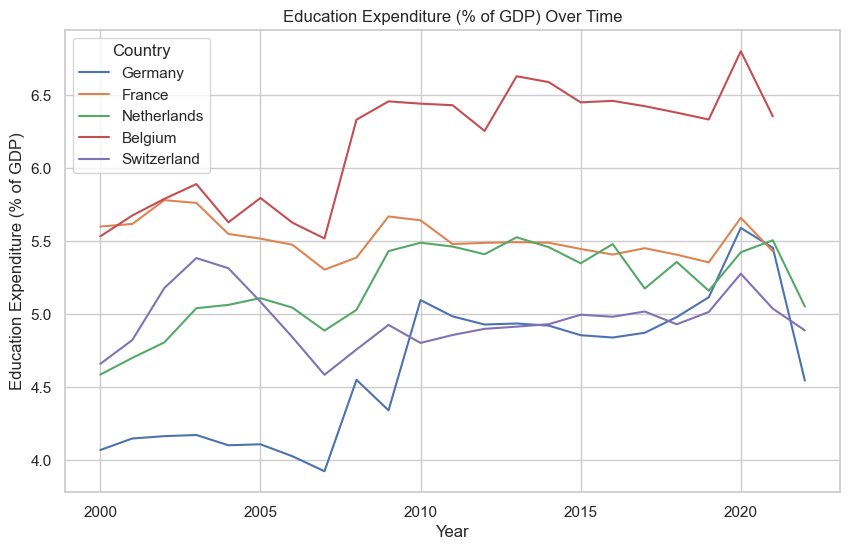

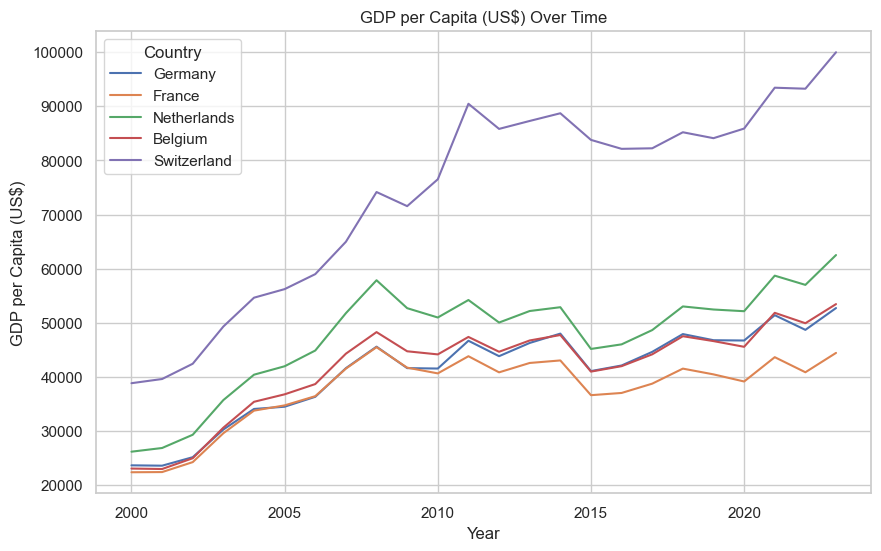

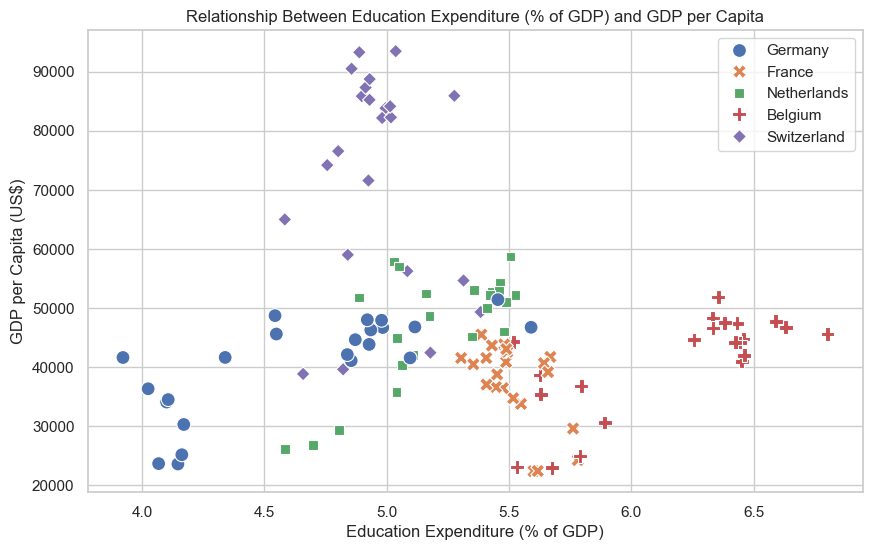

In [124]:
# Set the style for the plots
sns.set(style="whitegrid")

# Line plot: Education Expenditure over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x="Year", y="Education Expenditure (% of GDP)", hue="Country Name")
plt.title("Education Expenditure (% of GDP) Over Time")
plt.xlabel("Year")
plt.ylabel("Education Expenditure (% of GDP)")
plt.legend(title="Country")
plt.show()

# Line plot: GDP per Capita over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x="Year", y="GDP per Capita (US$)", hue="Country Name")
plt.title("GDP per Capita (US$) Over Time")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (US$)")
plt.legend(title="Country")
plt.show()

# Scatter plot: Education Expenditure vs. GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data,
    x="Education Expenditure (% of GDP)",
    y="GDP per Capita (US$)",
    hue="Country Name",
    style="Country Name",
    s=100
)
plt.title("Relationship Between Education Expenditure (% of GDP) and GDP per Capita")
plt.xlabel("Education Expenditure (% of GDP)")
plt.ylabel("GDP per Capita (US$)")
plt.legend()
plt.show()

### Visualization Breakdown

This section includes three visualizations to explore the relationship between **Education Expenditure (% of GDP)** and **GDP per Capita (US$)** over time for the selected Western European countries: **Germany, France, Netherlands, Belgium, Switzerland**.

#### 1. Education Expenditure Over Time
- **Plot Description**: A line plot showing how education expenditure as a percentage of GDP has changed from 2000 to 2023 for each country.
- **Key Insights**:
  - Belgium spends the highest percentage of GDP on education, though the margin is narrow - only about 1% more than the other countries.
  - Switzerland's education expenditure peaked in 2003 and has not returned to that level since.
  - All countries experienced a dip in education expenditure after 2020, with Germany showing the steepest decline.
  - From 2013 onwards, most countries maintained education expenditure between 4.5% and 5.5% of GDP, except Belgium, which consistently stood higher at 6.5%.
  - Germany initially had the lowest education expenditure but increased its investment between 2005 and 2010, aligning with other countries.
  - The lowest expenditure across all countries occurred around 2006-2007, followed by a gradual increase.

#### 2. GDP per Capita Over Time
- **Plot Description**: A line plot tracking the GDP per capita (in US dollars) for each country from 2000 to 2023.
- **Key Insights**:
  - Switzerland consistently has the highest GDP per capita, exceeding other countries by approximately $40,000.
  - All countries show a similar growth trend: a steady increase over time, with a slight dip between 2015 and 2020.
  - Germany and Belgium exhibit nearly identical GDP per capita trends from 2000 to the present.
  - France trails slightly behind Germany and Belgium, with a GDP per capita approximately $5,000 lower.
  - The Netherlands leads Germany and Belgium by a small margin, with a GDP per capita approximately $5,000 higher.
#### 3. Relationship Between Education Expenditure and GDP per Capita
- **Plot Description**: A scatterplot with each point representing a specific year for a given country. The plot illustrates the relationship between education expenditure and GDP per capita.
- **Key Insights**:
  - The relationship between education expenditure and GDP shows a mixed correlation: neither strongly positive nor negative.
  - Switzerland has relatively low education expenditure (% of GDP) but boasts one of the highest GDPs, likely influenced by other factors.
  - Belgium allocates the highest education expenditure (% of GDP) but does not have a GDP as high as Switzerland or the Netherlands.
  - A positive correlation is evident for the Netherlands, with a slight positive trend observed for Germany.
  - France, however, shows a slight negative correlation between education expenditure and GDP.

---

### Key Takeaways:
- **Education Investment and Economic Outcomes**:
  - The relationship between education expenditure and GDP is complex and multifaceted, with no clear or consistent correlation.
  - Countries like Switzerland show that a high GDP does not necessarily require high education expenditure, suggesting other drivers at play within each country.
  - On the other hand, Belgium's high investment in education does not translate to GDP levels comparable to Switzerland or the Netherlands.
  - Positive trends in countries like the Netherlands and Germany hint at potential benefits of targeted education spending on economic outcomes, though further analysis is needed.
- **Variability Across Countries**:
  - Trends in education expenditure (% of GDP) are largely consistent across Western Europe.
  - Switzerland may have unique factors influencing its economic strength, seeing as its GDP is exceptionally higher than other countries with similar education expenditure levels.
  - All countries show similar GDP growth trends since 2000.
- **Next Steps**: 
  - Conduct a deeper analysis to identify other contributing factors to GDP.
  - Explore regional or sector-specific impacts of education investment within countries to uncover hidden correlations.
  - Consider expanding the analysis to include more metrics (ie. workforce productivity, education quality).

# Regression Analysis

In [46]:
# Prepare data for regression
cleaned_data = merged_data.dropna(subset=["Education Expenditure (% of GDP)", "GDP per Capita (US$)"]).copy()

X = cleaned_data["Education Expenditure (% of GDP)"]
y = cleaned_data["GDP per Capita (US$)"]
X = sm.add_constant(X)

# Combined regression
model = sm.OLS(y, X).fit()
print("Combined Regression Results:")
print(model.summary())

# Regression for each country
for country in cleaned_data["Country Name"].unique():
    country_data = cleaned_data[cleaned_data["Country Name"] == country]
    X_country = sm.add_constant(country_data["Education Expenditure (% of GDP)"])
    y_country = country_data["GDP per Capita (US$)"]
    X_country = X_country.apply(pd.to_numeric, errors='coerce')
    y_country = pd.to_numeric(y_country, errors='coerce')
    model_country = sm.OLS(y_country, X_country).fit()
    print(f"Regression results for {country}:")
    print(model_country.summary())
    print("-" * 80)

Combined Regression Results:
                             OLS Regression Results                             
Dep. Variable:     GDP per Capita (US$)   R-squared:                       0.011
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.213
Date:                  Tue, 10 Dec 2024   Prob (F-statistic):              0.273
Time:                          00:17:39   Log-Likelihood:                -1259.3
No. Observations:                   113   AIC:                             2523.
Df Residuals:                       111   BIC:                             2528.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

### Explanation:

#### Combined Regression Results:
-R-squared = 0.011: Approximately 1.1% of the variation in GDP per capita is explained by education expenditure across all countries.

-Significant Relationship: The coefficient for Education Expenditure (% of GDP) is -2860.9474 (p > 0.273), indicating a negative relationship.

#### Country-Specific Results:

-Germany:
R-squared = 0.553: 55.3% of the variation in GDP per capita is explained by education expenditure.
Positive Relationship: Coefficient = 12,650 (p = 0).

-France:
R-squared = 0.350: 35% of the variation in GDP per capita is explained by education expenditure.
Strong Negative Relationship: Coefficient = -32,000 (p = 0.004).

-Netherlands:
R-squared = 0.507: 50.7% of the variation in GDP per capita is explained by education expenditure.
Positive Relationship: Coefficient = 24,390 (p = 0).

-Belgium:
R-squared = 0.524: 52.4% of the variation in GDP per capita is explained by education expenditure.
Positive Relationship: Coefficient = 15,230 (p = 0).

-Switzerland:
R-squared = 0.004: Only 0.4% of the variation in GDP per capita is explained by education expenditure.
Slight Negative Relationship but Statistically Insignificant: Coefficient = -5,535.3718 (p = 0.786). This exceptionally high p-value means there is not a statistically significant relationship between these two variables for Switzerland.

#### Observations and Insights:
- Switzerland has the highest GDP per capita, but has an extremely weak relationship between education expenditure and GDP.
- All countries show a positive relationship besides France and Switzerland.
- Germany, Netherlands, and Belgium show relatively high R-squared values, indicating that education spending plays a more significant role in GDP variation in these countries.

# Regression Visualized

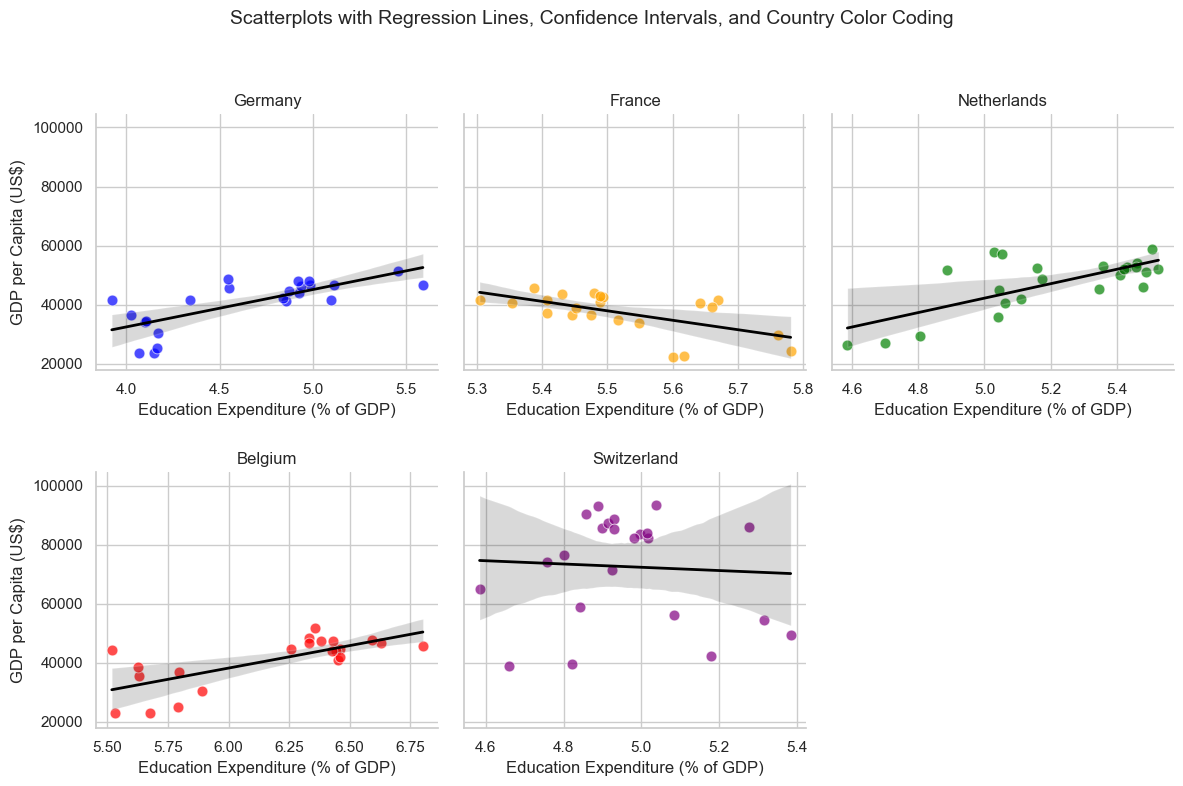

In [47]:
# Define the consistent color palette for each country
country_colors = {
    "Germany": "blue",
    "France": "orange",
    "Netherlands": "green",
    "Belgium": "red",
    "Switzerland": "purple"
}

# Create a FacetGrid for scatterplots with confidence intervals
g = sns.FacetGrid(
    cleaned_data,
    col="Country Name",
    col_wrap=3,
    sharex=False,
    sharey=True,
    height=4,
    aspect=1
)

# Plot scatterplots and regression lines for each country
def plot_scatter_with_regplot(data, **kwargs):
    country = data["Country Name"].iloc[0]
    sns.scatterplot(
        data=data,
        x="Education Expenditure (% of GDP)",
        y="GDP per Capita (US$)",
        color=country_colors[country],
        alpha=0.7,
        s=60
    )
    sns.regplot(
        data=data,
        x="Education Expenditure (% of GDP)",
        y="GDP per Capita (US$)",
        scatter=False,
        line_kws={"color": "black", "linewidth": 2},
        ci=95
    )

g.map_dataframe(plot_scatter_with_regplot)

# Add titles and labels
for ax, country in zip(g.axes.flat, country_colors.keys()):
    ax.set_title(country, fontsize=12)
    ax.set_xlabel("Education Expenditure (% of GDP)")
    ax.set_ylabel("GDP per Capita (US$)")

# Final adjustments
plt.subplots_adjust(top=0.85, hspace=0.4)
g.fig.suptitle("Scatterplots with Regression Lines, Confidence Intervals, and Country Color Coding", fontsize=14)
plt.show()

### Updated Summary of Results:

The scatterplots with regression lines illustrate the relationship between **Education Expenditure (% of GDP)** and **GDP per Capita (US$)** for five Western European countries: **Germany, France, Netherlands, Belgium, Switzerland**. Below are the updated insights:

- **Mixed Trends**: Germany, Netherlands, and Belgium a positive relationship between education expenditure and GDP per capita (with varying strenght levels). Switzerland shows a relatively weak negative relationship and France shows a stronger negative relationship.
- **Variance**: All countries show a significant relationship between education expenditure and GDP per capita except for Switzerland. Switzerland has an extremely weak relationship between education expenditure and GDP. As stated above, the country may have unique factors influencing its economic strength that do not involve education expenditure.
- **Country-Specific Factors**: Economic structure and non-education-related investments likely influence the differences in R^2 values and regression slopes.

# Subquestion 1: Gov Expenditure to R&D VS GDP
Do countries that allocate a higher percentage of GDP to Research & Development see a higher GDP per capita?

## Subquestion 1 Data Loading and Cleaning

In [76]:
# Load the data
q1_file = 'C:/Users/jlai.PRISMSOFTWARE/OneDrive - Prism Software/Desktop/MIDS/DS 200/WDI_HigherEducation_RnD_Original.xlsx'
q1 = pd.read_excel(q1_file)

# Melt dataset to display years better
rd = q1.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    var_name="Year",
    value_name="Value"
)

# Convert columns to numeric
rd["Year"] = rd["Year"].str.extract(r"(\d+)").astype(float)
rd["Value"] = pd.to_numeric(
    rd["Value"], errors="coerce"
)

# Filter for relevant countries
western_europe = ['Germany', 'France', 'Netherlands', 'Belgium', 'Switzerland']

rd = rd[rd['Country Name'].isin(western_europe)]
rd = rd[rd['Series Name'] == 'Research and development expenditure (% of GDP)']

# Pivot the DataFrame so filtered variable values are in separate columns
rdm = rd.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Rename columns for clarity
rdm.rename(columns={'Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)': '% of population with Doctoral degree', 
                           'Research and development expenditure (% of GDP)': 'R&D Expenditure (% of GDP)'}, inplace=True)

# Merge this dataset with primary dataset to get GDP data
rd_gdp = pd.merge(
    rdm,
    ecodevm,
    on=['Country Name', 'Year'],
    how='inner'
)
rd_gdp = rd_gdp.drop(columns=['Series Name'])

## Subquestion 1 Figures

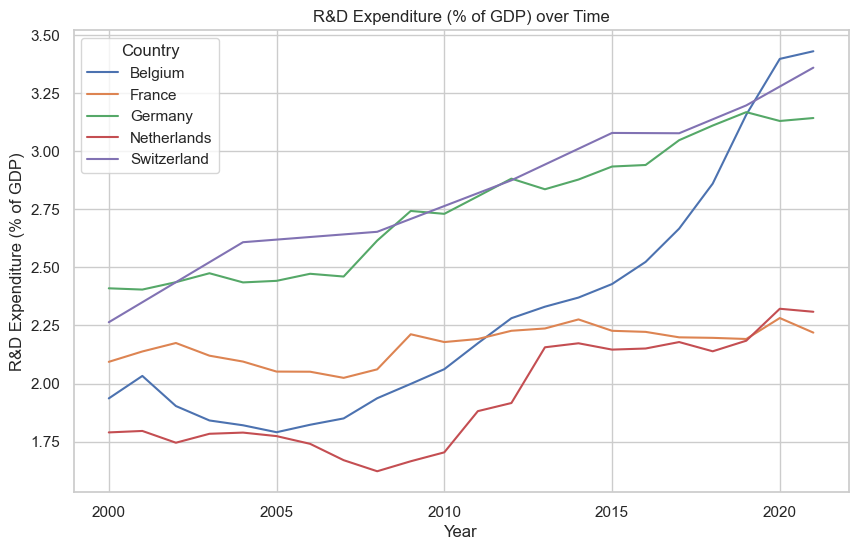

C:\Users\jlai.PRISMSOFTWARE\AppData\Local\Temp\ipykernel_16948\822175356.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
C:\Users\jlai.PRISMSOFTWARE\AppData\Local\Temp\ipykernel_16948\822175356.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]


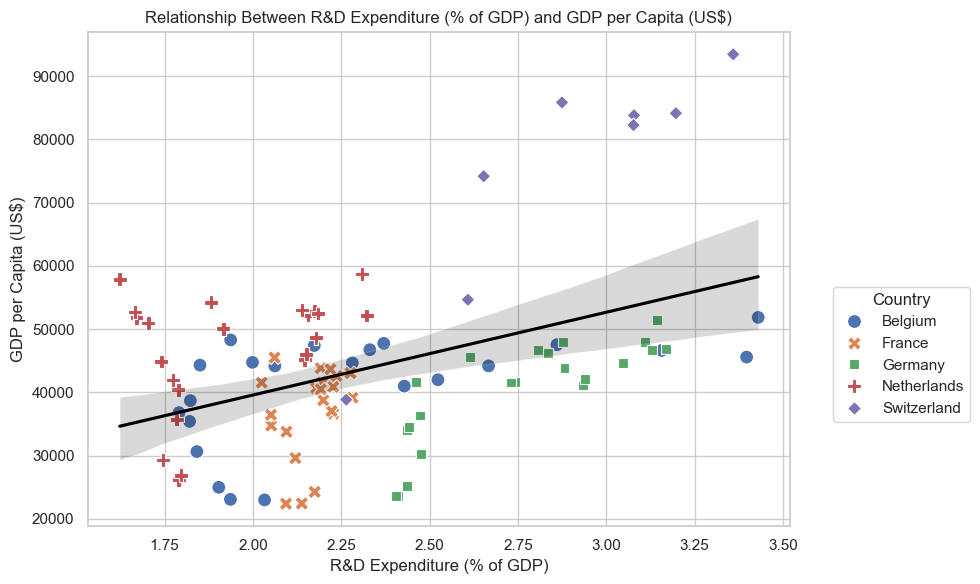

In [77]:
# Line plot: R&D Expenditure (% of GDP) over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=rd_gdp, x="Year", y="R&D Expenditure (% of GDP)", hue="Country Name")
plt.title("R&D Expenditure (% of GDP) over Time")
plt.xlabel("Year")
plt.ylabel("R&D Expenditure (% of GDP)")
plt.legend(title="Country")
plt.show()

# Relationship plots: R&D Expenditure (% of GDP) vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rd_gdp,
    x="R&D Expenditure (% of GDP)",
    y="GDP per Capita (US$)",
    hue="Country Name",
    style="Country Name",
    s=100
)

# Regression line
X = sm.add_constant(rd_gdp["R&D Expenditure (% of GDP)"])
y = rd_gdp["GDP per Capita (US$)"]
model = sm.OLS(y, X).fit()
sns.regplot(
    data=rd_gdp,
    x="R&D Expenditure (% of GDP)",
    y="GDP per Capita (US$)",
    scatter=False,
    color="black"
)
    
# Add regression equation and R-squared
r_squared = model.rsquared
slope = model.params[1]
intercept = model.params[0]
ax.text(
    0.05, 0.95,
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_squared:.2f}$",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.7)
)

# Customize the plot
plt.title(f"Relationship Between R&D Expenditure (% of GDP) and GDP per Capita (US$)")
plt.xlabel("R&D Expenditure (% of GDP)")
plt.ylabel("GDP per Capita (US$)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 0.5))

# Adjust layout
plt.tight_layout()
plt.show()

### Visualization Breakdown

This section includes two visualizations to explore the relationship between **Government Expenditure on Research & Design (% GDP)** and **GDP per Capita (US$)** over time for the selected Western European countries: **Germany, France, Netherlands, Belgium, Switzerland**.

#### 1. Government Expenditure on R&D (% GDP)
- **Plot Description**: A line plot showing how government expenditure on R&D has fluctuated from 2000 to 2023 for each country.
- **Key Insights**:
    - Belgium exhibits gradual exponential growth in R&D expenditure.
    - Switzerland consistently has the highest government expenditure on R&D.
    - Germany’s expenditure on R&D is not far behind Switzerland.
    - France shows little to no change, with expenditure remaining largely stagnant.
    - The Netherlands has the lowest expenditure, with a noticeable dip in 2008.

#### 2. Relationship Between Government Expenditure on R&D and GDP per Capita
- **Plot Description**: A scatterplot with each point representing a specific year for a given country. The plot illustrates the relationship between government expenditure on R&D and GDP per capita.
- **Regression Insights**: The equation y=13082.97x+13429.22 indicates that for every 1% increase in government expenditure on R&D, the GDP per capita is predicted to rise by approximately $13,082.97. However, the R^2 value of 0.19 reveals that only 19% of the variation in GDP per capita is explained by government R&D expenditure.
- **Key Insights**: This relatively low R^2 value suggests that while there is a positive relationship between government R&D expenditure and GDP per capita, other unexplored factors likely play a more significant role in influencing Western European country GDPs.

---

### Key Takeaways:
- **R&D Investment and Economic Outcomes**:
    - Government expenditure on R&D shows a positive but limited relationship with GDP per capita. While investing in R&D can foster economic growth, other factors, such as education quality, workforce skills, and broader economic conditions, significantly influence GDP outcomes.
    - Switzerland and Germany's consistently high investment demonstrate potential links between sustained R&D funding and economic performance.
- **Variability Across Countries**:
    - Much variability across countries, indicating diverse national priorities and approaches to economic growth.
    - Examples:
        - Switzerland's high expenditure aligns with its strong economic standing.
        - The Netherlands, with the lowest R&D spending and a dip in 2008, shows that reduced investment can coincide with economic challenges.
        - France's stagnant R&D investment shows potentially limited emphasis on this growth driver. This could explain its relatively lower GDP.
        - Germany's close alignment with Switzerland suggests a competitive focus on innovation-driven growth.
- **Next Steps**: 
    - Analyze different innovation variables that could potentially contribute to GDP.
    - Extend the analysis to include more years or countries in this region to identify trends.


# Subquestion 2: Unemployment Rates for Individuals with Advanced Education VS GDP
Do countries with higher GDP per capita see lower unemployment rates among individuals with advanced education?

## Subquestion 2 Data Loading and Cleaning

In [75]:
# Load the data
q2_file = 'C:/Users/jlai.PRISMSOFTWARE/OneDrive - Prism Software/Desktop/MIDS/DS 200/WDI_Unemployment_Education_Original.xlsx'
q2 = pd.read_excel(q2_file)

# Melt dataset to display years better
unemployment_edu = q2.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    var_name="Year",
    value_name="% Unemployed with Advanced Education"
)

# Convert columns to numeric
unemployment_edu["Year"] = unemployment_edu["Year"].str.extract(r"(\d+)").astype(float)
unemployment_edu["% Unemployed with Advanced Education"] = pd.to_numeric(
    unemployment_edu["% Unemployed with Advanced Education"], errors="coerce"
)

# Filter for relevant countries and variables
western_europe = ['Germany', 'France', 'Netherlands', 'Belgium', 'Switzerland']
unemployment_edu = unemployment_edu[unemployment_edu['Country Name'].isin(western_europe)]
unemployment_edu = unemployment_edu[unemployment_edu['Series Name'] == 'Unemployment with advanced education (% of total labor force with advanced education)']

# Merge this dataset with primary dataset to get GDP data
unad_gdp = pd.merge(
    unemployment_edu,
    ecodevm,
    on=['Country Name', 'Year'],
    how='inner'
)
unad_gdp = unad_gdp.drop(columns=['Series Name_x', 'Series Name_y'])

## Subquestion 2 Figure

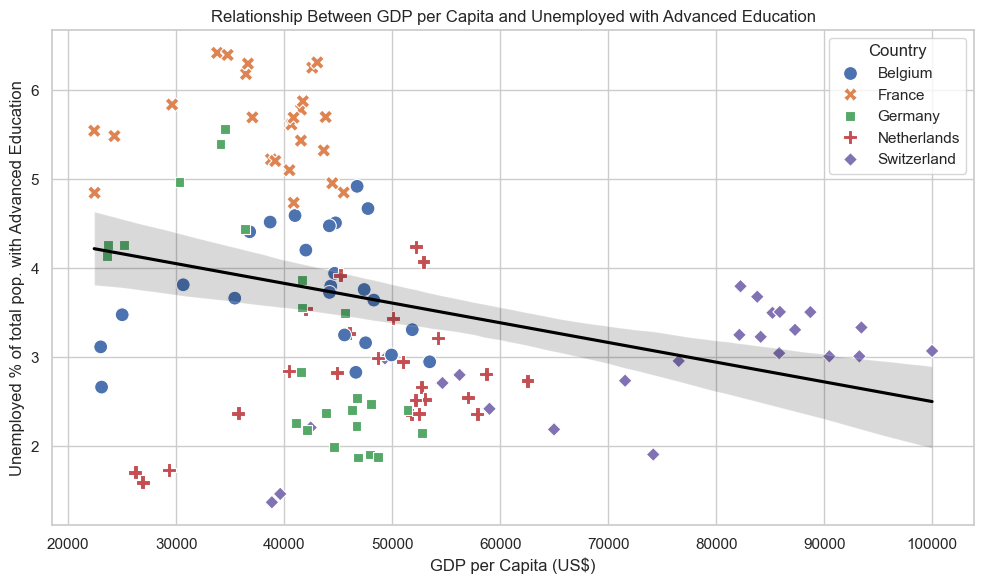

In [70]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=unad_gdp,
    x="GDP per Capita (US$)",
    y="% Unemployed with Advanced Education",
    hue="Country Name",
    style="Country Name",
    s=100
)

sns.regplot(
    data=unad_gdp,
    x="GDP per Capita (US$)",
    y="% Unemployed with Advanced Education",
    scatter=False,
    color="black"
)

X = sm.add_constant(unad_gdp["GDP per Capita (US$)"])
y = unad_gdp["% Unemployed with Advanced Education"]
model = sm.OLS(y, X).fit()

plt.title("Relationship Between GDP per Capita and Unemployed with Advanced Education")
plt.xlabel("GDP per Capita (US$)")
plt.ylabel("Unemployed % of total pop. with Advanced Education")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

### Visualization Breakdown

This section includes a visualization to explore the relationship between **GDP per Capita (US$)** and **Unemployed % of total population with Advanced Education** over time for the selected Western European countries: **Germany, France, Netherlands, Belgium, Switzerland**.

- **Plot Description**: A scatterplot with each point representing a specific year for a given country. The plot illustrates the relationship between GDP per capita and unemployment within the total population with advanced education in each country.
- **Key Insights**: There is overall a slight negative relationship, where higher GDP tends to correlate with lower unemployment rates among people with advanced education degrees. 

---

### Key Takeaways:
- **Economy vs. Unemployment amongst the Advanced Education Population**:
    - While higher GDP appears to generally correlate with lower unemployment in this population, the extent of this relationship varies. 
    - Additional factors unique to each country also play critical roles.
- **Variability Across Countries**:
    - France sees the highest unemployment rate and has a lower GDP than other countries, which may suggest challenges within the country's labor market. - On the other end of the graph, Switzerland has low unemployment and an extremely high GDP, which suggests an efficient labor market. 
    - Netherlands sees an unusual, slightly positive relationship where GDP and unemployment both appear to increase, suggesting the influence of unique external factors.
- **Next Steps**: 
    - Examine labor markets within countries to see how different policies impact individuals with advanced education and their job searches.
    - Investigate external economic/education indicators that could influence unemployment for this population.